# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

## Imports

In [176]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import scipy
import statistics as stats
from scipy.stats import norm, poisson, skewnorm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Dataset loading

In [177]:
# Loading the data
df = pd.read_csv("/content/Superstore Marketing Data - Sheet1.csv")

In [178]:
# First five rows of the data
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [179]:
# Last five rows of the data
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


## Shape of the dataset

In [180]:
# Shape of the dataset
df.shape

(2240, 22)

* The shape of the dataset is (2240,22) that means the dataset have 2240 rows and 22 columns.

## List of the columns

In [181]:
column_list = list(df.columns)
column_list

['Id',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain']

## Column description

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase


## Information about the columns

In [182]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Check the number of the duplicate rows

In [183]:
# Duplicate rows
df.duplicated().sum()

0

* There are zero duplicate rows in our dataset.

## Statistical Information

In [184]:
statistical_description = df.describe()
statistical_description

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


## Missing values/Null values

In [185]:
# Checking the missing values
missing_values = df.isnull().sum()
missing_values

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

* There are 24 missing values in the Income column.

## **Preprocessing the Dataset**

## Median Imputation of the missing values in the Income column

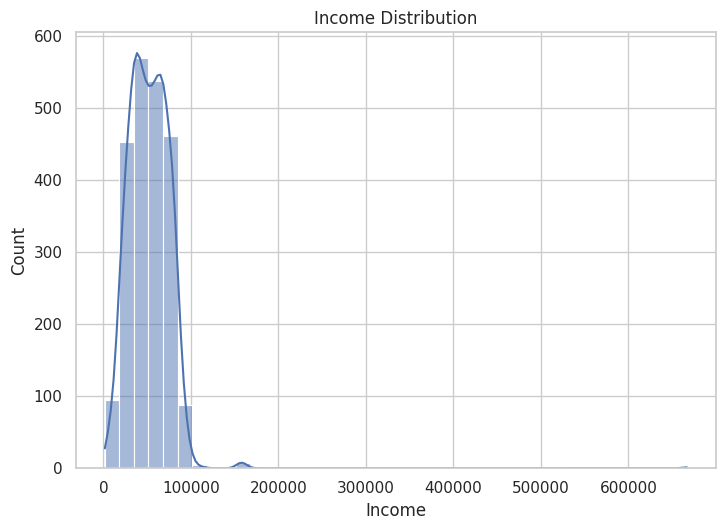

In [186]:
# Distribution of the dataset
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Income'], bins=40, kde=True)
plt.title('Income Distribution')
plt.tight_layout()
plt.show()

In [187]:
skewness_value = df['Income'].skew()
skewness_value

6.763487372811116

* The skewness value of the dataset is around 6.7 is extremely high right skewed distribution. Majority of the data is left side of distribution and long right tail.

In [188]:
# Calculate the median of the 'Income' column
income_median = df['Income'].median()
income_median

51381.5

In [189]:
# Impute the missing values with median values
df['Income'].fillna(income_median, inplace = True)

## Converting datatype as datetime format for 'Dt_Customer'

* The Dt_Customer column has the invalid date rows as '########' and it should be removed.

In [190]:
# Identify the rows with invalid dates
invalid_date_rows = df['Dt_Customer'].str.contains('########', na=False)

# Remove the rows with invalid dates
df = df[~invalid_date_rows]

* The 'Dt_Customer' column have the date of customer's enrollment with the company have the datatype as object and should be converted to datetime format.

In [191]:
# Convert "Dt_Customer" to datetime format
df ['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

## Converting to category in Education and Martial_Status Column

In [192]:
# Type converting to category in Education Column
df['Education'].astype('category')

0       Graduation
1       Graduation
2       Graduation
5              PhD
6         2n Cycle
           ...    
2230      2n Cycle
2233      2n Cycle
2234    Graduation
2236      2n Cycle
2238    Graduation
Name: Education, Length: 1324, dtype: category
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [193]:
# Type converting to category in Marital_Status Column
df['Marital_Status'].astype('category')

0       Divorced
1         Single
2        Married
5         Single
6        Married
          ...   
2230     Married
2233    Divorced
2234    Divorced
2236     Married
2238     Married
Name: Marital_Status, Length: 1324, dtype: category
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
                         'YOLO']

## Removing the inconsistent Entries in Martial_Status Column

In [194]:
# Count the number of outliers or inconsitent values
category_count = df.groupby('Marital_Status').size()
category_count

Marital_Status
Absurd        1
Alone         1
Divorced    151
Married     505
Single      285
Together    343
Widow        36
YOLO          2
dtype: int64

* The Categories "The Absurd", "Alone", and "YOLO" from the marital status categories are removed as they are outliers or incorrect entries, which could impact the accuracy and reliability of the data analysis that follows.

In [195]:
# Remove rows with Incorrect values
unexpected_values = ['YOLO', 'Absurd', 'Alone']
df = df[~df['Marital_Status'].isin(unexpected_values)]
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

## Data Types of the Columns

In [196]:
# Data Types of the columns of the datasets
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

## **Distribution of the Customer Demographics**

## Age Distribution

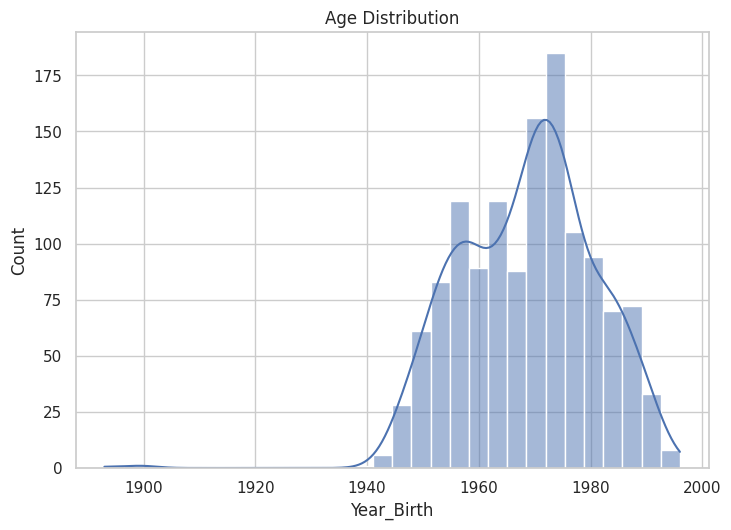

In [197]:
# Age Distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Year_Birth'], bins=30, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

## Education Distribution

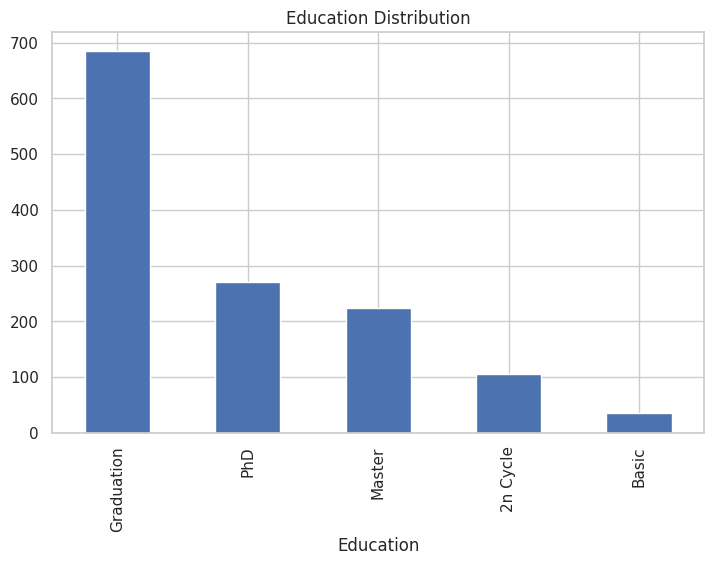

In [198]:
# Education Distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
df['Education'].value_counts().plot(kind='bar')
plt.title('Education Distribution')
plt.tight_layout()
plt.show()

## Martial Status Distribution

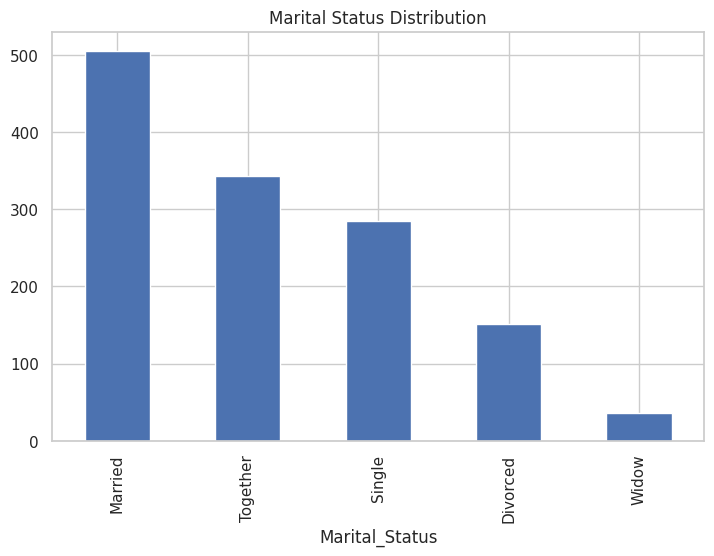

In [199]:
# Marital Status Distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

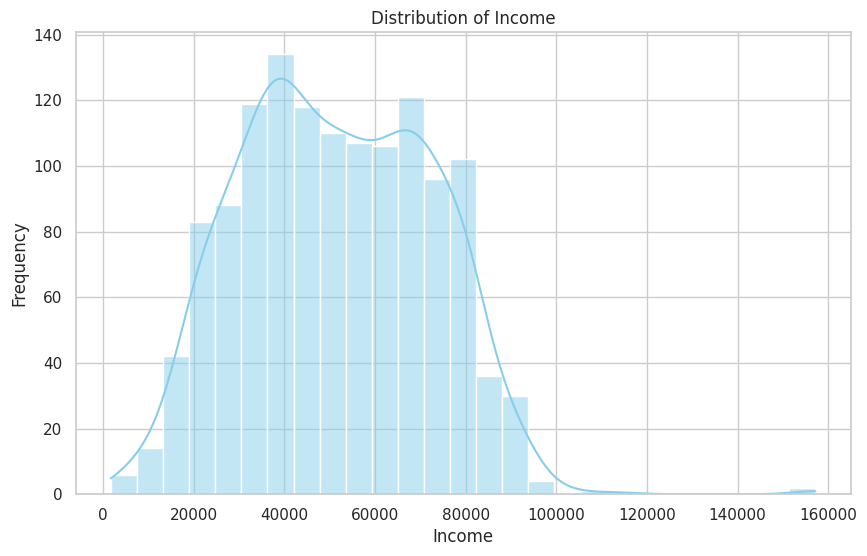

In [200]:
# Plot the distribution of 'Income'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color='skyblue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

* The Age distribution is Right-Skewed and Income distribution is left-Skewed and the outliers should be removed for the better analysis and the reliability of the dataset.

## Removing the outliers from income and year of birth column

## Removing the outliers from the Income column

In [201]:
# Calculate the z-scores for Income
z_scores = np.abs((df['Income'] - df['Income'].mean()) / df['Income'].std())

# Define a threshold for z-scores
threshold = 3

# Identify outliers
outliers = df[z_scores > threshold]

# Remove outliers
df = df[z_scores <= threshold]

## Removing the outliers from the Year of birth column

In [202]:
# Calculate z-scores for 'Year_Birth'
z_scores_age = np.abs((df['Year_Birth'] - df['Year_Birth'].mean()) / df['Year_Birth'].std())

# Define a threshold for z-scores
threshold_age = 3

# Identify and remove outliers based on z-scores
df = df[z_scores_age <= threshold_age]

## Statistical Description of the the dataset

In [203]:
print(statistical_description)

                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

## Shape of Dataset after removing the outliers

In [204]:
df.shape

(1315, 22)

* After removing the outliers or inconsistent data entries, there are total of 1315 rows and 22 columns.

## Creating the new Column from the dataset

## Total spends is sum of all segmentwise spendings

In [205]:
# Create a new feature 'Total_Spending' based on spending columns
df['Total_Spends'] = df[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [206]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spends
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,251
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,1192
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,1215


## Age of customer

In [207]:
# Create a new feature 'Age' based on the year of birth column
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [208]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spends,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,1190,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,577,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,251,66
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,43,1,4,7,5,2,1,0,1192,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,65,1,10,10,7,6,1,0,1215,70


In [209]:
df.shape

(1315, 24)

The 2 features were created based on the existing columns from the database.

# Grouping the columns to form a relevant datasets

## Financial Behaviour Statistics

In [210]:
# Extract relevant columns
key_activity = ['Income', 'Recency', 'Total_Spends']

# Create dataframe
key_df = df[key_activity].copy()

# Calculate statistics
statistics_data_general = {
    'Mean': key_df.mean(),
    'Median': key_df.median(),
    'Variance': key_df.var(),
    'Std Deviation': key_df.std()
}

# Create a DataFrame
stats_df_fin_behaviour = pd.DataFrame(statistics_data_general)

# Display the table
print("Financial behaviour Statistics:")
stats_df_fin_behaviour

Financial behaviour Statistics:


,Mean,Median,Variance,Std Deviation
Income,51244.080989,50664.0,4.191867e+08,20474.049970
Recency,49.414449,50.0,8.280815e+02,28.776406
Total_Spends,596.736882,358.0,3.603459e+05,600.288208


## Spending Activities

In [211]:
# Extract relevant columns
amount_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']

# Create dataframe
amount_spent_df = df[amount_spent].copy()

# Calculate statistics
statistics_data_amount_spent = {
    'Mean': amount_spent_df.mean(),
    'Median': amount_spent_df.median(),
    'Variance': amount_spent_df.var(),
    'Std Deviation': amount_spent_df.std()
}

# Create a DataFrame
statistics_df_amount_spent = pd.DataFrame(statistics_data_amount_spent)

# Display the table
print("\nAmount Spent DataFrame Statistics:")
statistics_df_amount_spent


Amount Spent DataFrame Statistics:


,Mean,Median,Variance,Std Deviation
MntWines,302.577947,171.0,114785.789011,338.800515
MntFruits,25.193916,7.0,1481.045321,38.484352
MntMeatProducts,161.359696,66.0,46303.615574,215.182749
MntFishProducts,36.473004,11.0,2949.934392,54.313298
MntSweetProducts,27.180989,8.0,1728.833276,41.579241
MntGoldProds,43.951331,24.0,2744.166579,52.384793


## Purchase Activities

In [212]:
# Extract relevant columns
purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Create dataframe
purchases_df = df[purchases].copy()

# Calculate statistics
statistics_data_purchases = {
    'Mean': purchases_df.mean(),
    'Median': purchases_df.median(),
    'Variance': purchases_df.var(),
    'Std Deviation': purchases_df.std()
}

# Create a DataFrame
statistics_df_purchases = pd.DataFrame(statistics_data_purchases)

# Display the table
print("\nPurchase Numbers DataFrame Statistics:")
statistics_df_purchases



Purchase Numbers DataFrame Statistics:


,Mean,Median,Variance,Std Deviation
NumWebPurchases,4.100380,4.0,7.697679,2.774469
NumCatalogPurchases,2.570342,1.0,7.526821,2.743505
NumStorePurchases,5.802281,5.0,10.682339,3.268385


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

# The key variables for the analysis are Income, Recency and Total spending.

### Mean and median of the key variables

In [213]:
# Key variables for the analysis
key_activity = ['Income', 'Recency', 'Total_Spends']

# Descriptive Statistics
descriptive_stats = df[key_activity].describe()

pd.DataFrame(descriptive_stats)

,Income,Recency,Total_Spends
count,1315.000000,1315.000000,1315.000000
mean,51244.080989,49.414449,596.736882
std,20474.049970,28.776406,600.288208
min,1730.000000,0.000000,5.000000
25%,35661.500000,25.000000,67.000000
50%,50664.000000,50.000000,358.000000
75%,68001.500000,74.000000,1034.000000
max,113734.000000,99.000000,2525.000000


## Mode

In [214]:
# Mode calculation
mode = df[key_activity].mode().transpose()
pd.DataFrame(mode)

,0,1
Income,51381.5,NaN
Recency,65.0,NaN
Total_Spends,22.0,46.0


## Variance

In [215]:
# Variance
variance = df[key_activity].var()
print("Variance:","\n",variance)

Variance: 
 Income          4.191867e+08
Recency         8.280815e+02
Total_Spends    3.603459e+05
dtype: float64


## Standard Deviation

In [216]:
# Standard Deviation
std_dev = df[key_activity].std()
print("Standard Deviation:","\n",std_dev)

Standard Deviation: 
 Income          20474.049970
Recency            28.776406
Total_Spends      600.288208
dtype: float64


## Identifying Outliers

## For Income

In [217]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spends,Age


* There are zero outliers in the income column.

## For Recency

In [218]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'Recency' column
Q1 = df['Recency'].quantile(0.25)
Q3 = df['Recency'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'Recency' column
IQR = Q3 - Q1

# Define the lower bound and upper bound for outliers for 'Recency' column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'Recency' column
outliers = df[(df['Recency'] < lower_bound) | (df['Recency'] > upper_bound)]
outliers

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spends,Age


* There are zero outliers for the Recency column.

## For Total Spending

In [219]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'Total_Spends' column
Q1 = df['Total_Spends'].quantile(0.25)
Q3 = df['Total_Spends'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'Total_Spends' column
IQR = Q3 - Q1

# Define the lower bound and upper bound for outliers for 'Total_Spends' column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'Total_Spends' column
outliers = df[(df['Total_Spends'] < lower_bound) | (df['Total_Spends'] > upper_bound)]
outliers


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spends,Age
671,5735,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,96,1,3,4,10,1,0,0,2525,33
672,5350,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,96,1,3,4,10,1,1,0,2525,33
1026,4580,1969,Graduation,Married,75759.0,0,0,2013-10-25,46,1394,...,182,1,9,7,9,5,1,0,2486,55
1404,1763,1988,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,...,33,1,7,11,10,4,1,0,2524,36


* There are 4 outliers in the data. The 75th percentile value for 'Total_Spends' is 1034. Based on the data, these outliers have both high income and high recency, which contributes to their higher spending levels. Therefore, these values are not necessarily incorrect or erroneous. Removing these data points may not be necessary as they provide insights into a segment of customers with higher spending behavior, which could be valuable for analysis and decision-making.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

# Identifying Variables that follow a specific probability distributions

## Distribution, Probabilities and Expected values of Income feature

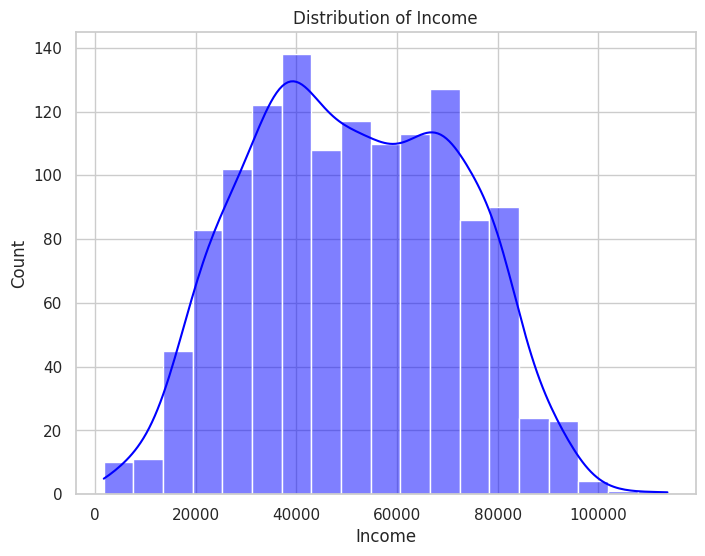

In [220]:
# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'Income'
sns.histplot(df['Income'].dropna(), kde=True, color='blue', ax=ax)
ax.set_title('Distribution of Income')
ax.set_xlabel('Income')

# Show the plot
plt.show()

* The distribution of the Income feature is Normal distribution.

In [221]:
# Probability and expected values of the Income feature
income_data = df['Income']
income_mean = income_data.mean()
income_std = income_data.std()
income_probabilities = norm.pdf(income_data, income_mean, income_std)
income_expected_value = income_data.mean()  # Using mean as an approximation for the expected value

print("Income Distribution:")
print(f"Mean: {income_mean:.2f}")
print(f"Standard Deviation: {income_std:.2f}")
print(f"Probabilities: {income_probabilities}")
print(f"Expected Value: {income_expected_value:.2f}")

Income Distribution:
Mean: 51244.08
Standard Deviation: 20474.05
Probabilities: [5.07222090e-06 1.87066933e-05 1.43454082e-05 ... 7.82473944e-06
 1.19834719e-05 1.51239123e-05]
Expected Value: 51244.08


## Distribution, Probabilities and Expected values of Recency feature

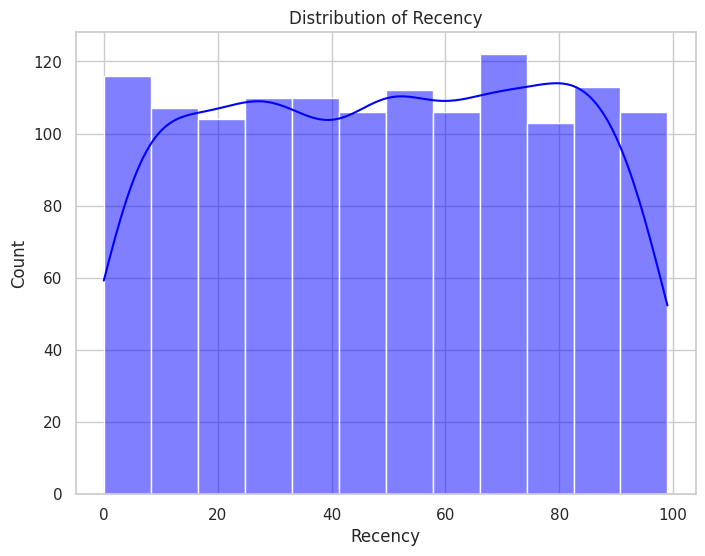

In [222]:
# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'Recency'
sns.histplot(df['Recency'], kde=True, color='blue', ax=ax)
ax.set_title('Distribution of Recency')
ax.set_xlabel('Recency')

# Show the plot
plt.show()

* The distribution of the Recency feature is Normal distribution.

In [223]:
# Probability and expected value of the Regency feature
recency_data = df['Recency']
recency_mean = recency_data.mean()
recency_std = recency_data.std()
recency_probabilities = norm.pdf(recency_data, recency_mean, recency_std)
recency_expected_value = recency_data.mean()

print("Recency Distribution:")
print(f"Mean: {recency_mean:.2f}")
print(f"Standard Deviation: {recency_std:.2f}")
print(f"Probabilities: {recency_probabilities}")
print(f"Expected Value: {recency_expected_value:.2f}")

Recency Distribution:
Mean: 49.41
Standard Deviation: 28.78
Probabilities: [0.0031737 0.0031737 0.0031737 ... 0.0031414 0.0031414 0.0031414]
Expected Value: 49.41


## Distribution, Probabilities and Expected values of Total Spending feature

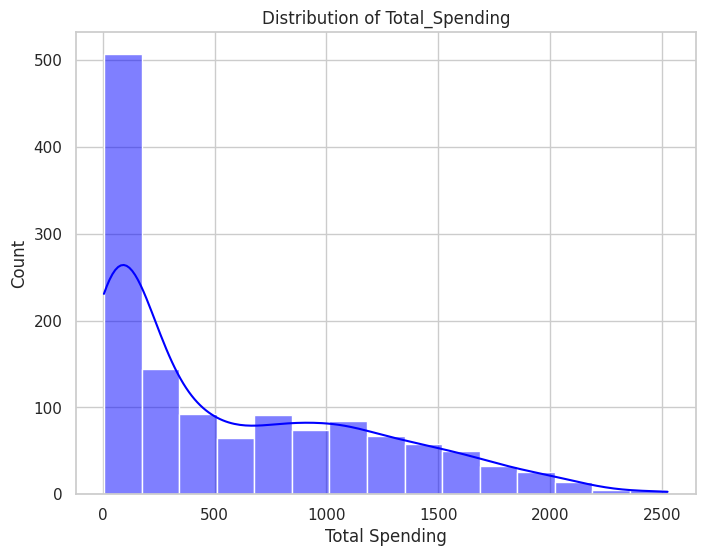

In [224]:
# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'Total_Spending'
sns.histplot(df['Total_Spends'], kde=True, color='blue', ax=ax)
ax.set_title('Distribution of Total_Spending')
ax.set_xlabel('Total Spending')

# Show the plot
plt.show()

* The distribution of the Total spending feature is Skewed-Normal Distribution.

In [225]:
# Probability and expected values of the Total spends feature
total_spending_data = df['Total_Spends']
total_spending_skew = total_spending_data.skew()
total_spending_probabilities = skewnorm.pdf(total_spending_data, total_spending_skew)
total_spending_expected_value = total_spending_data.mean()


print("Total Spending Distribution:")
print(f"Skewness: {total_spending_skew:.2f}")
print(f"Probabilities: {total_spending_probabilities}")
print(f"Expected Value: {total_spending_expected_value:.2f}")

Total Spending Distribution:
Skewness: 0.90
Probabilities: [0. 0. 0. ... 0. 0. 0.]
Expected Value: 596.74


## Distribution, Probabilities and Expected values of Number of visit feature

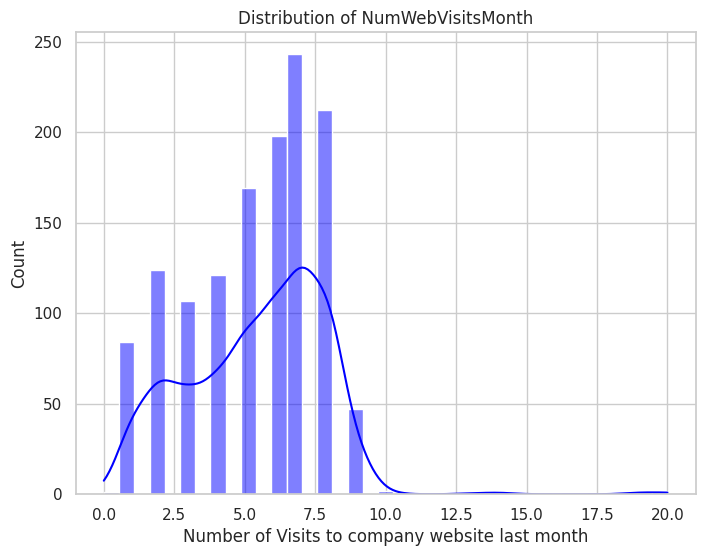

In [226]:
# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'NumWebVisitsMonth'
sns.histplot(df['NumWebVisitsMonth'], kde=True, color='blue', ax=ax)
ax.set_title('Distribution of NumWebVisitsMonth')
ax.set_xlabel('Number of Visits to company website last month')

# Show the plot
plt.show()


* The distribution of the Number of visits to company webiste feature is skewed-Normal distribution.

In [227]:
# Probability and expected value of the Number of website visits feature
web_visits_data = df['NumWebVisitsMonth']
web_visits_skew = web_visits_data.skew()
web_visits_probabilities = skewnorm.pdf(web_visits_data, web_visits_skew)
web_visits_expected_value = web_visits_data.mean()

print("Web Visits Distribution:")
print(f"Skewness: {web_visits_skew:.3f}")
print(f"Probabilities: {web_visits_probabilities}")
print(f"Expected Value: {web_visits_expected_value:.2f}")

Web Visits Distribution:
Skewness: 0.299
Probabilities: [2.98817104e-01 2.77253054e-06 7.82833480e-02 ... 2.36617078e-04
 1.00195692e-14 7.22395761e-03]
Expected Value: 5.42


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [228]:
# Identifying the relevant columns for segmentation
segmentation_1 = df[['Age','Income', 'Total_Spends','Recency']]

<Figure size 400x400 with 0 Axes>

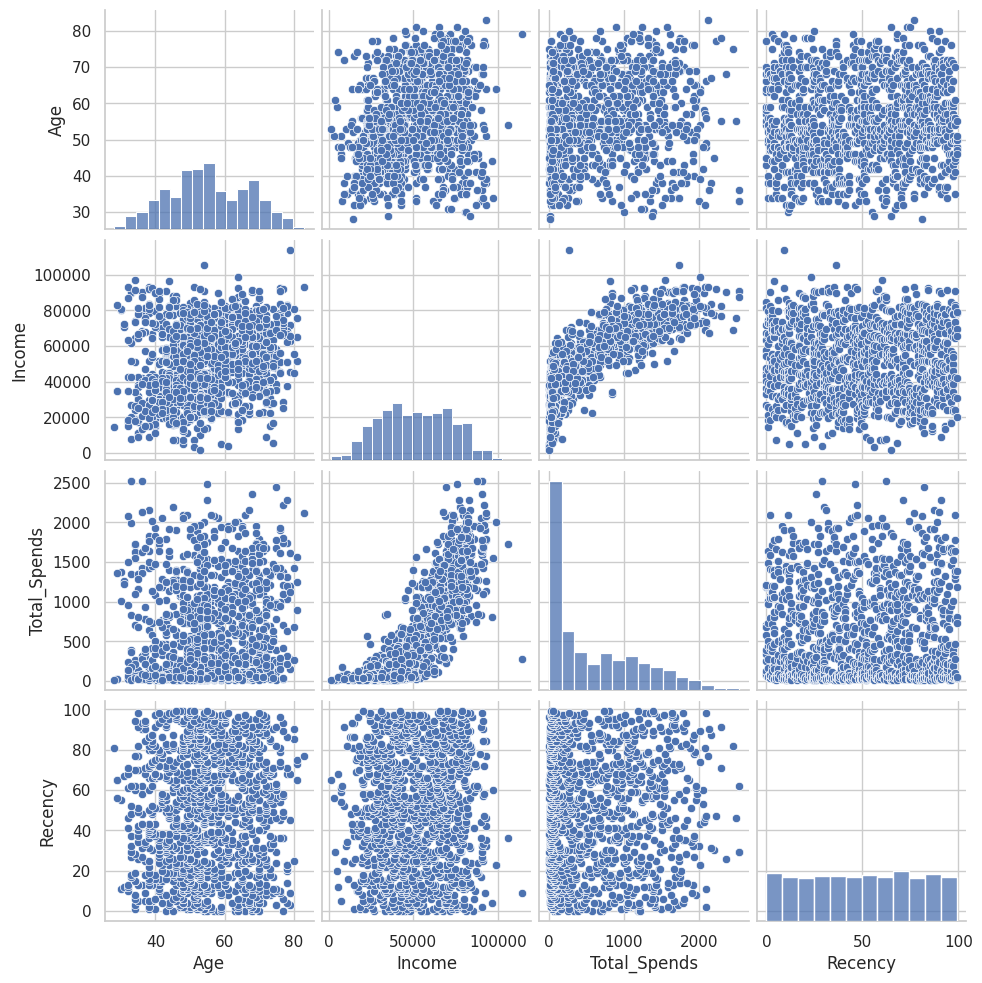

In [229]:
# data distributions
plt.figure(figsize=(4, 4))
sns.pairplot(segmentation_1)
plt.show()

* There is a positive correlation between income and total spending among customers. Higher income levels are associated with higher total spending behavior.

<Figure size 400x400 with 0 Axes>

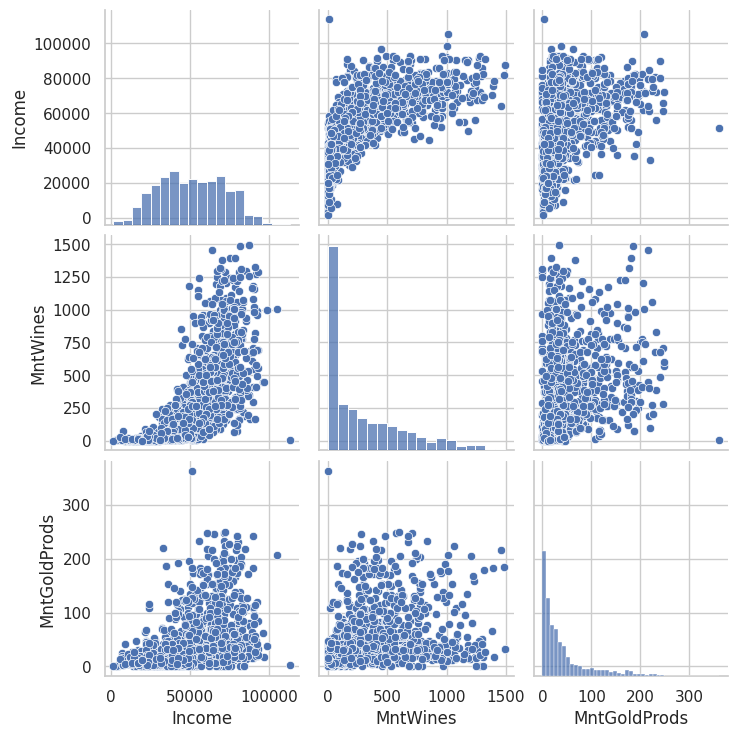

In [230]:
segmentation_2 = df[['Income','MntWines', 'MntGoldProds']]
# data distributions
plt.figure(figsize=(4, 4))
sns.pairplot(segmentation_2)
plt.show()

* There is an postitive correlation between Income and amount spend on wine and Gold products.

## Customer Segmentation based on Age and Total Spending considering the Kids in home

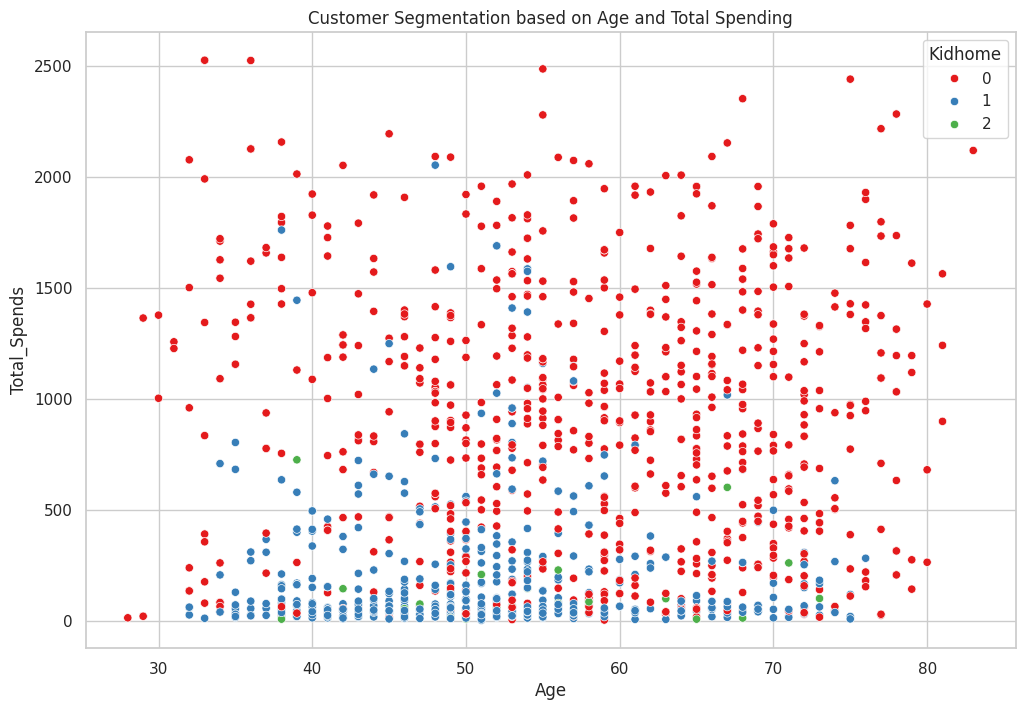

In [231]:
# Visualize segmentation results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Total_Spends', hue='Kidhome', data=df, palette='Set1')
plt.title('Customer Segmentation based on Age and Total Spending')
plt.show()

## Customer Segmentation based on Recency and Total Spending considering the Kids in home

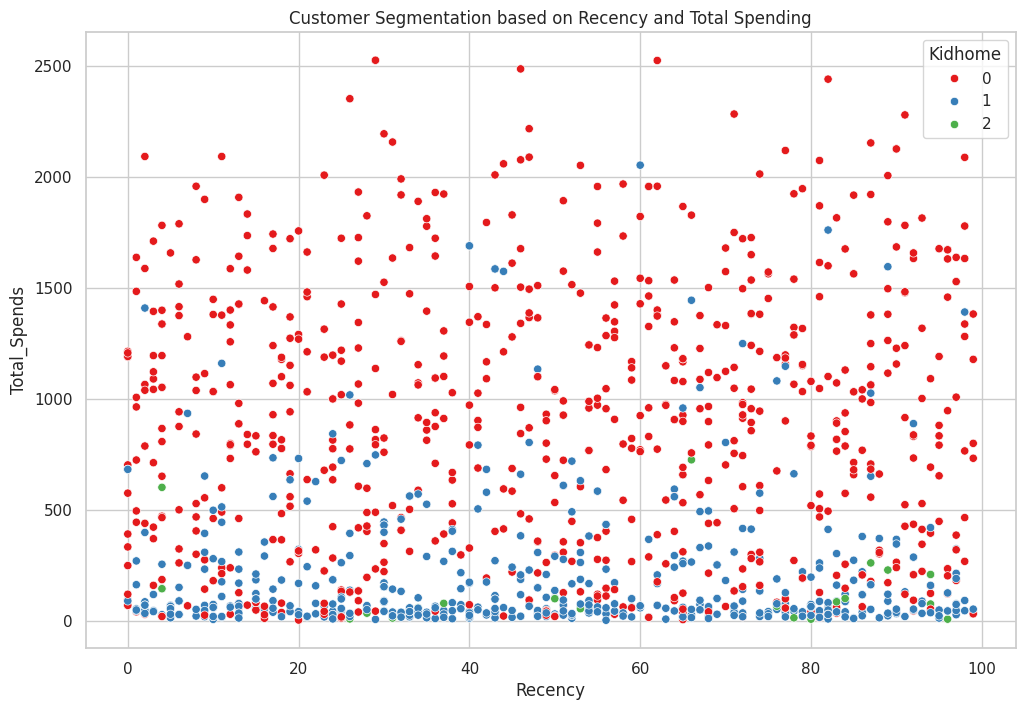

In [232]:
# Visualize segmentation results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Total_Spends', hue='Kidhome', data=df, palette='Set1')
plt.title('Customer Segmentation based on Recency and Total Spending')
plt.show()

## Customer Segmentation based on Total Spending and Number of Purchases on Deals

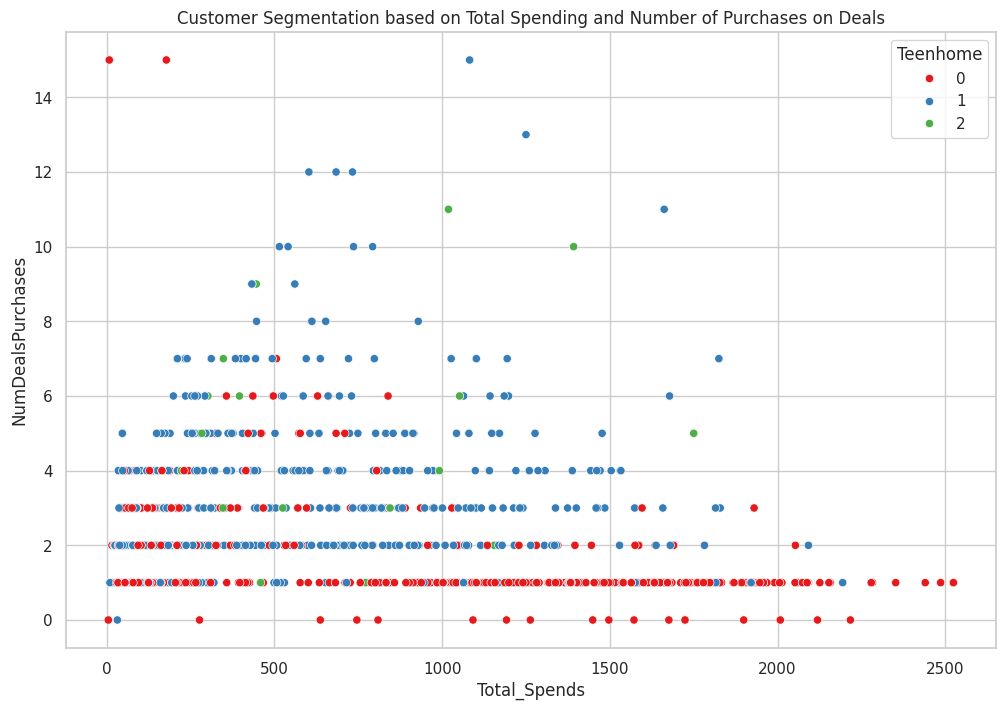

In [233]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_Spends', y='NumDealsPurchases', hue='Teenhome', data=df, palette='Set1')
plt.title('Customer Segmentation based on Total Spending and Number of Purchases on Deals')
plt.show()

* The higher number of deal purchases are done in customers who have Teenagers in the home.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

# Cutomer Analysis

## Age Distribution of Customers

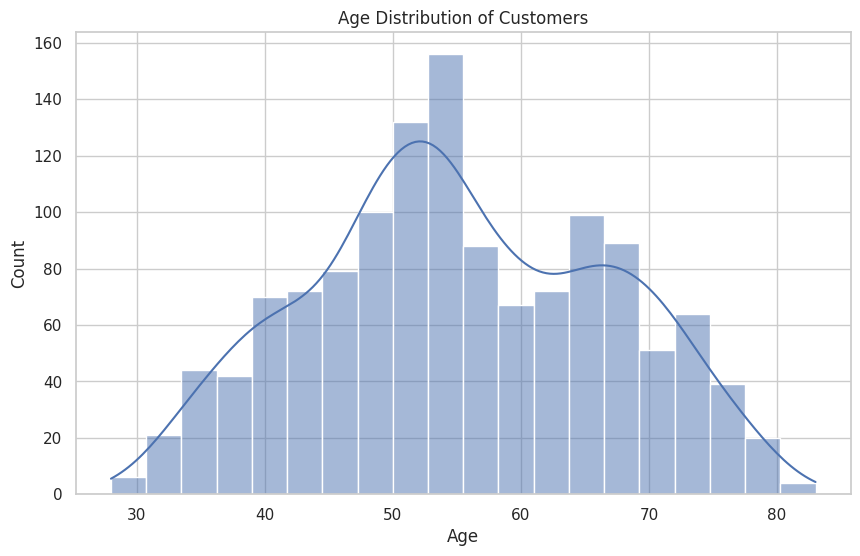

In [234]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.show()

## Education Distribution of Customers

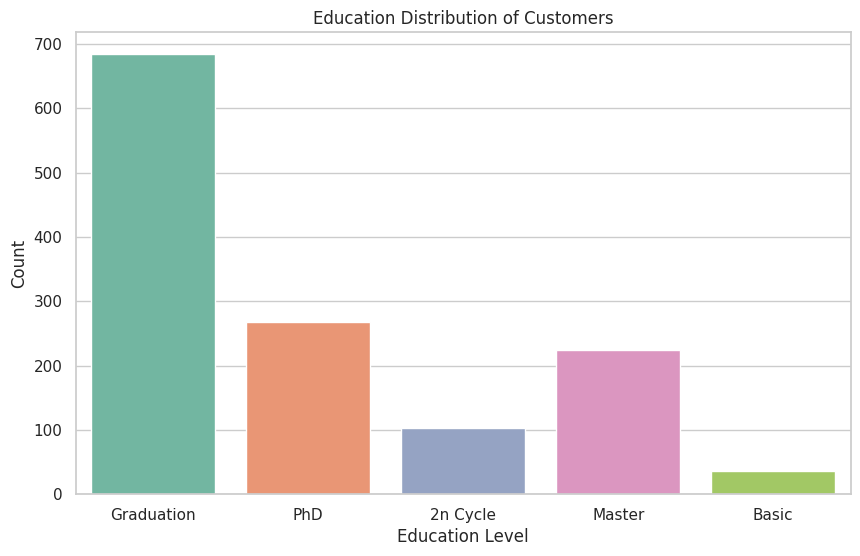

In [235]:
# Education Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, palette='Set2')
plt.title('Education Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

## Marital Status Distribution of Customers

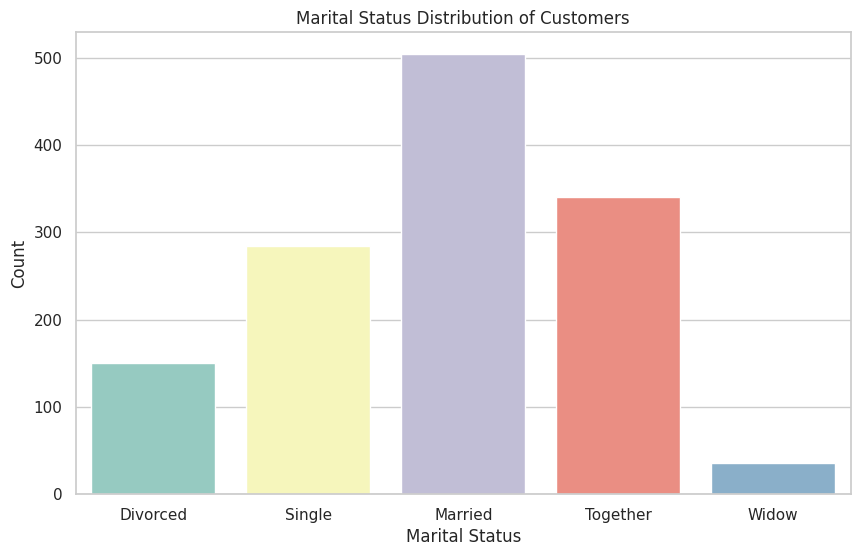

In [236]:
# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df, palette='Set3')
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Proportion of Total Spending of Customers by Product Categories

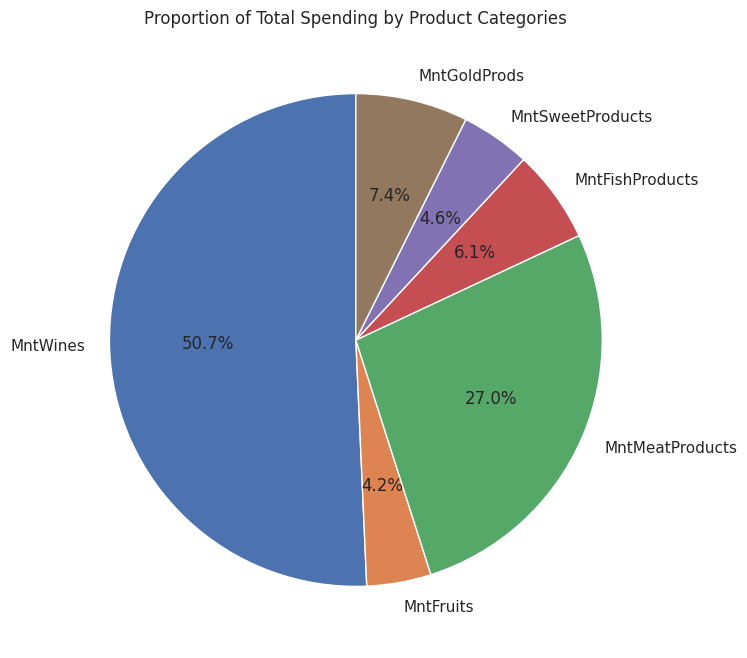

In [237]:
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(8, 8))
df[product_categories].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Spending by Product Categories')
plt.show()

## Proportion of Total Spending of Customers by Purchase Categories

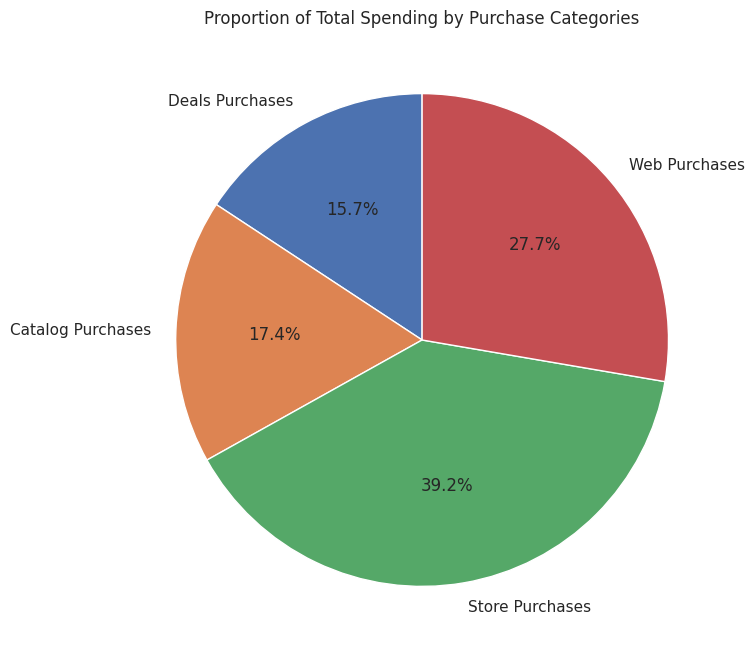

In [238]:
# Define the new column names
new_column_names = {
    'NumDealsPurchases': 'Deals Purchases',
    'NumCatalogPurchases': 'Catalog Purchases',
    'NumStorePurchases': 'Store Purchases',
    'NumWebPurchases': 'Web Purchases'
}

# Rename the columns using the new names
df = df.rename(columns=new_column_names)

# Define the product categories based on the new column names
product_categories = ['Deals Purchases', 'Catalog Purchases', 'Store Purchases', 'Web Purchases']

# Create a pie chart to show the proportion of total spending by product categories
plt.figure(figsize=(8, 8))
df[product_categories].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Spending by Purchase Categories')
plt.ylabel('')
plt.show()

## Month-wise Total Sales of all products

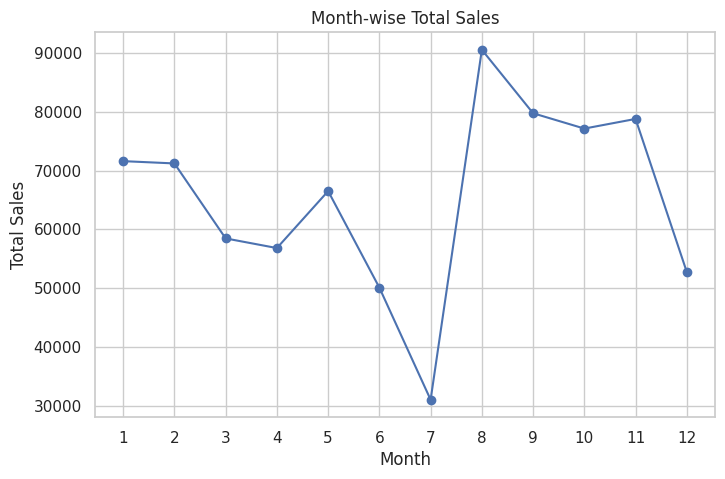

In [239]:
# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the month from 'Dt_Customer' and create a new column 'Month'
df['Month'] = df['Dt_Customer'].dt.month

# Group by 'Month' and calculate the total sales of gold products for each month
monthly_sales = df.groupby('Month')['Total_Spends'].sum()

# Plotting the line chart for month-wise total sales of gold products
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales_gold.index, monthly_sales.values, marker='o')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales_gold.index)  # Ensure x-axis ticks show all months
plt.grid(True)
plt.show()

## Month-wise Total Sales of Fish Products

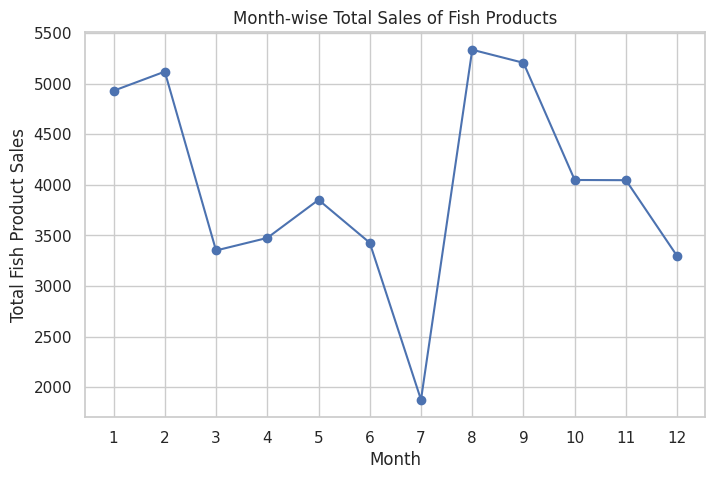

In [240]:
# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the month from 'Dt_Customer' and create a new column 'Month'
df['Month'] = df['Dt_Customer'].dt.month

# Group by 'Month' and calculate the total sales of fish products for each month
monthly_sales_fish = df.groupby('Month')['MntFishProducts'].sum()

# Plotting the line chart for month-wise total sales of fish products
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales_fish.index, monthly_sales_fish.values, marker='o')
plt.title('Month-wise Total Sales of Fish Products')
plt.xlabel('Month')
plt.ylabel('Total Fish Product Sales')
plt.xticks(monthly_sales_fish.index)  # Ensure x-axis ticks show all months
plt.grid(True)
plt.show()

## Month-wise Total Sales of Meat Products

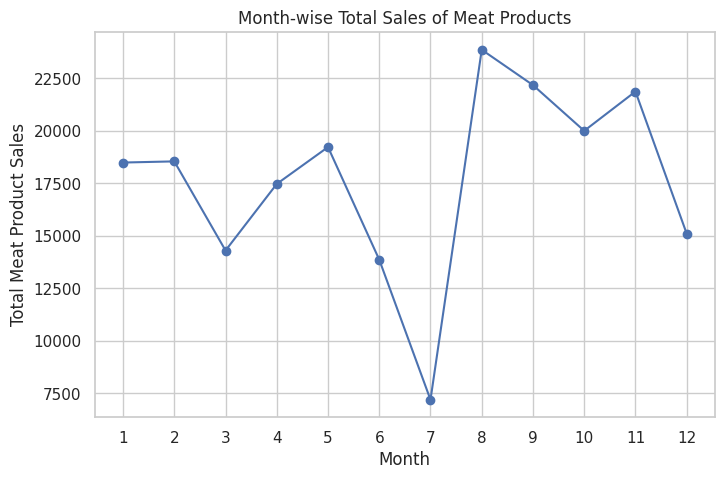

In [241]:
# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the month from 'Dt_Customer' and create a new column 'Month'
df['Month'] = df['Dt_Customer'].dt.month

# Group by 'Month' and calculate the total sales of meat products for each month
monthly_sales_meat = df.groupby('Month')['MntMeatProducts'].sum()

# Plotting the line chart for month-wise total sales of meat products
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales_meat.index, monthly_sales_meat.values, marker='o')
plt.title('Month-wise Total Sales of Meat Products')
plt.xlabel('Month')
plt.ylabel('Total Meat Product Sales')
plt.xticks(monthly_sales_meat.index)  # Ensure x-axis ticks show all months
plt.grid(True)
plt.show()

## Month-wise Total Sales of Sweet Products

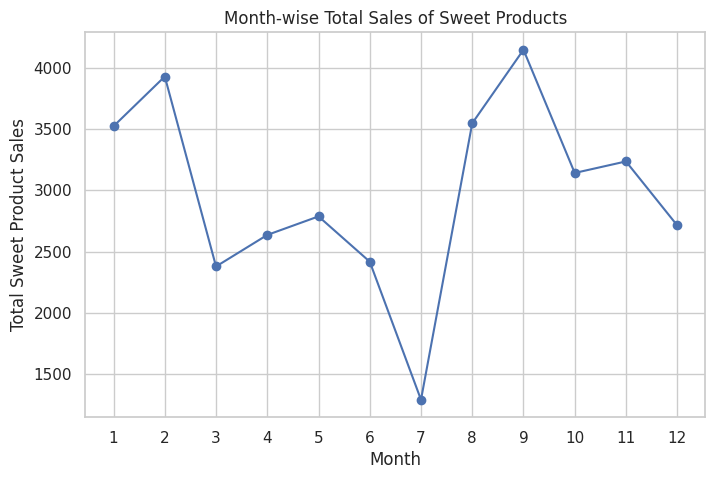

In [242]:
# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the month from 'Dt_Customer' and create a new column 'Month'
df['Month'] = df['Dt_Customer'].dt.month

# Group by 'Month' and calculate the total sales of sweet products for each month
monthly_sales_sweet = df.groupby('Month')['MntSweetProducts'].sum()

# Plotting the line chart for month-wise total sales of sweet products
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales_sweet.index, monthly_sales_sweet.values, marker='o')
plt.title('Month-wise Total Sales of Sweet Products')
plt.xlabel('Month')
plt.ylabel('Total Sweet Product Sales')
plt.xticks(monthly_sales_sweet.index)  # Ensure x-axis ticks show all months
plt.grid(True)
plt.show()

## Month-wise Total Sales of Fruit Products

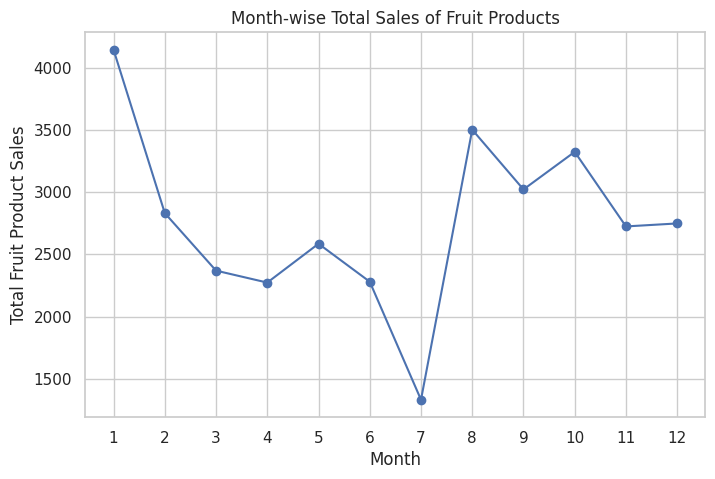

In [243]:
# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the month from 'Dt_Customer' and create a new column 'Month'
df['Month'] = df['Dt_Customer'].dt.month

# Group by 'Month' and calculate the total sales of fruit products for each month
monthly_sales_fruits = df.groupby('Month')['MntFruits'].sum()

# Plotting the line chart for month-wise total sales of fruit products
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales_fruits.index, monthly_sales_fruits.values, marker='o')
plt.title('Month-wise Total Sales of Fruit Products')
plt.xlabel('Month')
plt.ylabel('Total Fruit Product Sales')
plt.xticks(monthly_sales_fruits.index)  # Ensure x-axis ticks show all months
plt.grid(True)
plt.show()

## Month-wise Total Sales of Wine Products

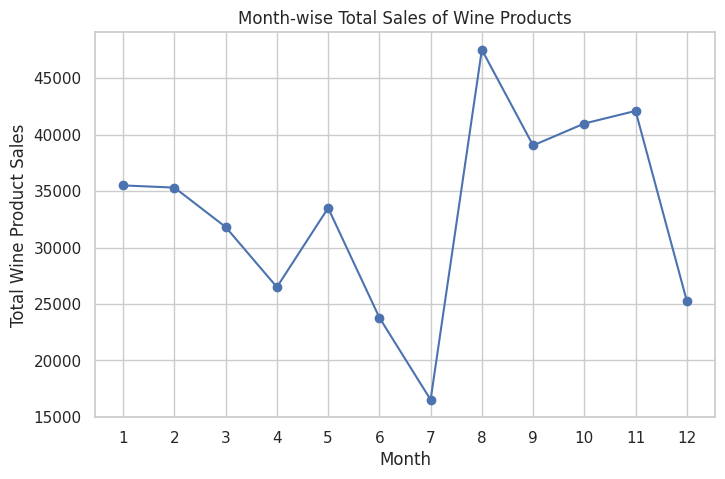

In [244]:
# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the month from 'Dt_Customer' and create a new column 'Month'
df['Month'] = df['Dt_Customer'].dt.month

# Group by 'Month' and calculate the total sales of wine products for each month
monthly_sales_wine = df.groupby('Month')['MntWines'].sum()

# Plotting the line chart for month-wise total sales of wine products
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales_wine.index, monthly_sales_wine.values, marker='o')
plt.title('Month-wise Total Sales of Wine Products')
plt.xlabel('Month')
plt.ylabel('Total Wine Product Sales')
plt.xticks(monthly_sales_wine.index)  # Ensure x-axis ticks show all months
plt.grid(True)
plt.show()

## Month-wise Total Sales of Gold Products

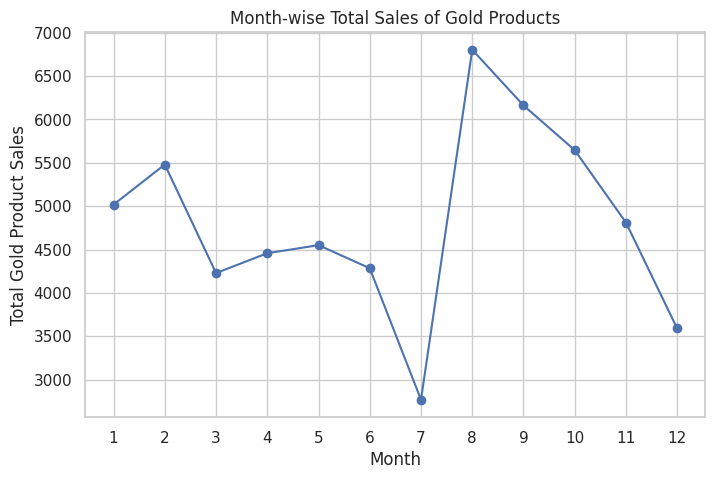

In [245]:
# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the month from 'Dt_Customer' and create a new column 'Month'
df['Month'] = df['Dt_Customer'].dt.month

# Group by 'Month' and calculate the total sales of gold products for each month
monthly_sales_gold = df.groupby('Month')['MntGoldProds'].sum()

# Plotting the line chart for month-wise total sales of gold products
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales_gold.index, monthly_sales_gold.values, marker='o')
plt.title('Month-wise Total Sales of Gold Products')
plt.xlabel('Month')
plt.ylabel('Total Gold Product Sales')
plt.xticks(monthly_sales_gold.index)  # Ensure x-axis ticks show all months
plt.grid(True)
plt.show()

# Key Insights and Actionable Recommendations

According to the analysis conducted, several valuable insights have emerged along with actionable recommendations for the company's consideration.

# **Age Distribution:**

Insight: The analysis reveals a roughly normal distribution in the age demographics of our customers.

Recommendation: Utilize targeted marketing strategies based on age segmentation to optimize promotional campaigns and product recommendations. Tailoring promotions according to different age groups can enhance engagement and drive more effective marketing outcomes.

# **Education Distribution:**


Insight: The analysis indicates that the largest segment of customers consists of graduates, whereas customers with basic education represent the smallest group.

Recommendation: Create personalized marketing content and offers based on customers' educational backgrounds to enhance engagement.Implement referral programs that incentivize educated customers to refer others, leveraging their networks and influence.

# **Marital Status Distribution:**
Insight: The analysis reveals that the majority of customers are married, whereas widow customers are the least represented.

Recommendation: Design special marketing campaigns offering exclusive discounts or gifts to married couples on their anniversary, fostering a strong bond between the organization and customers.Tailor advertising and promotions to appeal to married couples. Consider creating special promotions for couples.

# **Spending Pattern of Different Categories:**

Insight: The analysis indicates that customers allocate the highest spending towards wines, while fruits receive the least expenditure.

Recommendation: Direct marketing efforts towards promoting wine-related products, given their high demand. Additionally, explore opportunities to introduce new fruit-related products or implement promotional strategies to stimulate sales within this category.

# **Spending Pattern on Purchase Type:**
Insight: The analysis indicate that store purchase account for the largest proportion followed by the web purchases.

Recommendation: Segment customers based on buying behavior (store-only, online-only, and multi-channel) to tailor promotions and personalize the shopping experience.nvestigate if factors like product category or location influence channel preference. This could reveal opportunities for targeted online promotions.

# **Sales Trend on different Categories:**

Insight: The analysis indicates a downtrend in sales across all categories (Fish products, Meat products, Sweet products, Fruit products, Wine products, Gold products) for 4-5 months.

Recommendation: Conduct a detailed analysis to identify the root causes of the downtrend in sales across all product categories.Implement targeted marketing strategies and promotions to stimulate sales during the identified low-performing months.Explore opportunities to introduce new product variations or bundle offers to attract customers and boost sales.Leverage customer feedback and market trends to innovate and stay competitive in the market.

# **Sales Trend of Wine products and Gold products:**


Insight: Gold products and wine products sales have experienced a downward trend over the past four months, resulting in around 40% decrease during this period.

Recommendation: Conduct a thorough analysis to identify the factors contributing to the decline in sales for gold and wine products.Develop targeted marketing campaigns and promotions to reinvigorate interest and drive sales in these categories.Consider introducing new product variations or bundle offers to attract customers and stimulate demand.

# **Correlation Between Deal Purchases and Households with Teenagers**

Insight: The higher number of deal purchases are done in customers who have Teenagers in the home.

Recommendation: Capitalize on the correlation between deal purchases and households with teenagers by offering targeted promotions or discount bundles that appeal to this demographic.Develop marketing campaigns highlighting deals specifically tailored for families with teenagers, leveraging channels such as social media and digital advertising.
